In [11]:
# Importing necessary libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Downloading necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Axler\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Axler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Load the dataset
df = pd.read_csv('spam email dataset/email_classification.csv')


In [14]:
# Define custom stopwords
custom_stopwords = set([
    "You","you", "Your", "your", "We", "we", "here", "to", ".", "?", "!", "has", "been", "for", "a", "of",
    "You've", "you've", "Our", "our", "Don't", "don't", "We're", "we're", "us", "Her", "her", "His", "his", "with", "Here's", "here's", "let", "know"
])

In [15]:
# Function to separate words combined with ! and ?
def separate_combined_words(text):
    words = text.split()
    separated_words = []
    for word in words:
        if '!' in word:
            separated_words.append(word.replace('!', ''))
            separated_words.append('!')
        elif '?' in word:
            separated_words.append(word.replace('?', ''))
            separated_words.append('?')
        elif '.' in word:
            separated_words.append(word.replace('.', ''))
            separated_words.append('.')
        else:
            separated_words.append(word)
    return ' '.join(separated_words)

# Apply the function to the email column
df['email'] = df['email'].apply(separate_combined_words)

In [16]:
# Function to remove stopwords from text
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word.lower() not in custom_stopwords])

# Create a cleaned_email column by applying the remove_stopwords function
df['cleaned_email'] = df['email'].apply(remove_stopwords)

In [17]:
# Function to create n-grams
def create_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    return list(ngrams(tokens, n))

In [18]:
# Create bigrams and trigrams
bigrams = []
trigrams = []

In [19]:
# loop through each email in the cleaned_email column
for email in df['cleaned_email']:
    tokens = email.lower().split()  # Convert to lowercase
    bigrams.extend(ngrams(tokens, 2))
    trigrams.extend(ngrams(tokens, 3))

# Count the frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the most common bigrams and trigrams
most_common_bigrams = bigram_freq.most_common(10)
most_common_trigrams = trigram_freq.most_common(10)

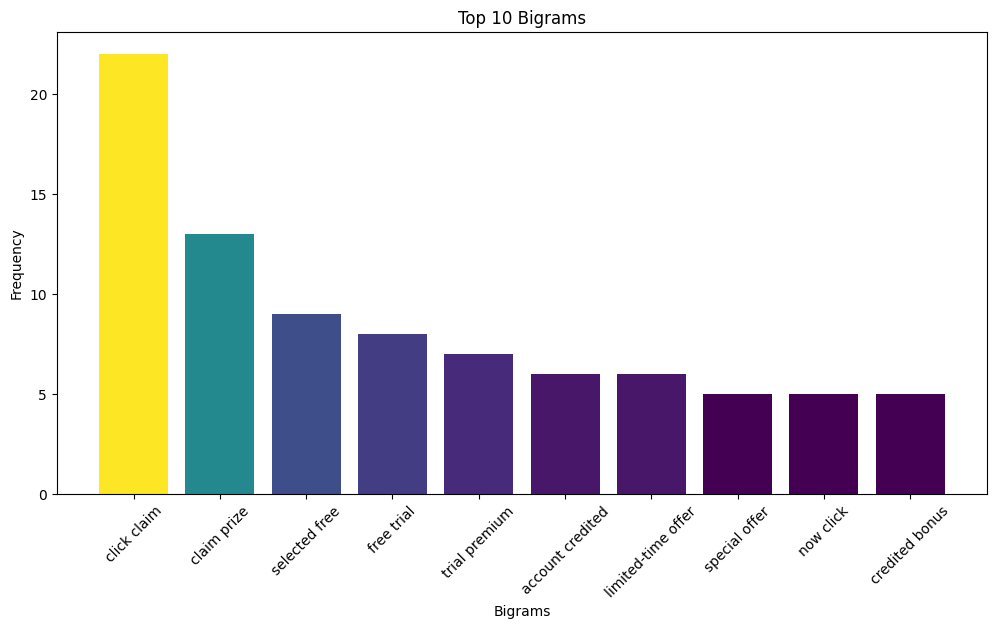

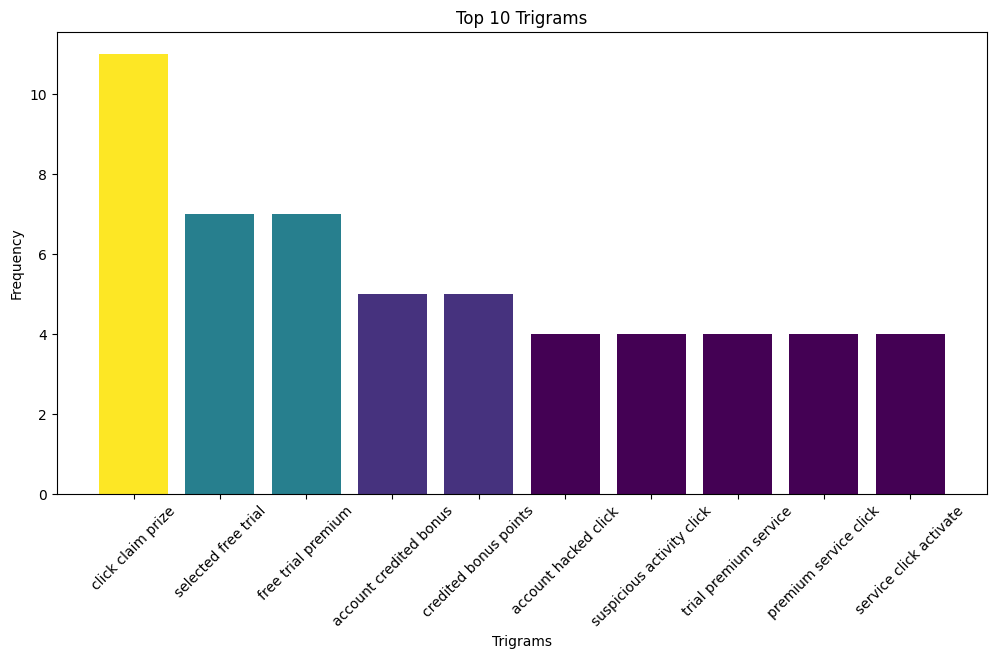

In [20]:
# Get frequencies for the most common bigrams
frequencies_bigrams = [freq for _, freq in most_common_bigrams]
# Get frequencies for the most common trigrams
frequencies_trigrams = [freq for _, freq in most_common_trigrams]

# Create a colormap
cmap = plt.get_cmap('viridis')  # A popular colormap for visualizations

# Normalize frequencies to the range [0, 1] for color mapping
norm_bigrams = plt.Normalize(min(frequencies_bigrams), max(frequencies_bigrams))
norm_trigrams = plt.Normalize(min(frequencies_trigrams), max(frequencies_trigrams))

# Create a color array based on the normalized frequencies
colors_bigrams = [cmap(norm_bigrams(freq)) for freq in frequencies_bigrams]
colors_trigrams = [cmap(norm_trigrams(freq)) for freq in frequencies_trigrams]

# Visualization of bigrams
plt.figure(figsize=(12, 6))
plt.bar([' '.join(bigram) for bigram, _ in most_common_bigrams], frequencies_bigrams, color=colors_bigrams)
plt.title('Top 10 Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar([' '.join(trigram) for trigram, _ in most_common_trigrams], frequencies_trigrams, color=colors_trigrams)
plt.title('Top 10 Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
